In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_classification
import pylab
from scipy import stats

C:\Users\fende\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# генерируем случайные данные
x, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0)


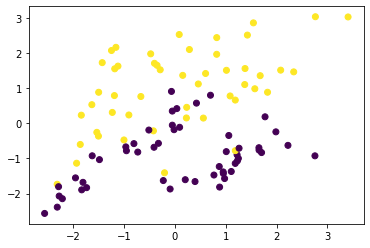

In [3]:
m, n = np.shape(x)
x = np.c_[ np.ones(m), x]
pylab.scatter(x[:,1], x[:,2], c=y)
pylab.show()

### Сначала вручную

In [4]:
# шаг алгоритма
alpha = 0.01

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:

def logloss(hypothesis, y):
    return -y*np.log(hypothesis) - (1 - y)*np.log(1 - hypothesis)

In [7]:
def gradient_descent_classification(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.array([0.5, 0.6, 0.7]) # ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        z = np.dot(x, theta) # матричное произведение
        
        hypothesis = sigmoid(z) 
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        print( f'logloss: {sum(logloss(hypothesis, y))}')
        
        gradient = np.dot(x_transpose, loss) / m         
        
        theta = theta - alpha * gradient  # update
    
    return theta

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [8]:
%%time
theta = gradient_descent_classification(alpha, x, y, 1000)
theta

logloss: 60.19586285881011
logloss: 60.07079896483126
logloss: 59.94636420644694
logloss: 59.82255603558456
logloss: 59.69937190387845
logloss: 59.57680926280224
logloss: 59.454865563800595
logloss: 59.33353825841963
logloss: 59.212824798437154
logloss: 59.092722635990945
logloss: 58.97322922370717
logloss: 58.854342014827004
logloss: 58.73605846333257
logloss: 58.618376024072255
logloss: 58.501292152884545
logloss: 58.384804306721065
logloss: 58.26890994376901
logloss: 58.15360652357169
logloss: 58.038891507149216
logloss: 57.924762357117245
logloss: 57.811216537805265
logloss: 57.698251515373485
logloss: 57.58586475792913
logloss: 57.47405373564142
logloss: 57.36281592085543
logloss: 57.25214878820537
logloss: 57.14204981472623
logloss: 57.03251647996485
logloss: 56.92354626608976
logloss: 56.81513665799995
logloss: 56.70728514343257
logloss: 56.59998921306973
logloss: 56.493246360644086
logloss: 56.387054083043296
logloss: 56.281409880413506
logloss: 56.176311256262
logloss: 56.0717

array([ 0.109057  , -0.4194895 ,  1.56812547])

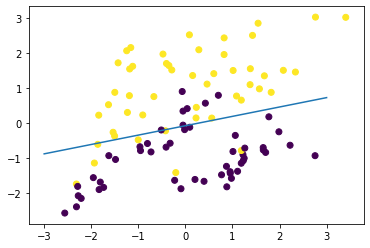

[-0.8720765798250308, 0.7329843972228569]

In [9]:
x_points = [-3, 3]
y_points = []
for x_point in x_points:
    y_point = -(theta[0] + (theta[1]*x_point))/theta[2]
    y_points.append(y_point)

pylab.plot(x_points, y_points)
pylab.scatter(x[:,1], x[:,2], c=y)
pylab.show()
y_points

### Используем готовые методы

In [10]:
from sklearn import linear_model


In [11]:
model = linear_model.SGDClassifier( alpha = 0.01, max_iter = 1000 )

In [12]:
x = x[:,1:]


In [13]:
%%time 

model.fit( x, y )

Wall time: 997 µs


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
model.intercept_, model.coef_

(array([0.04248972]), array([[-0.56602801,  1.61789986]]))

In [15]:
y_predict_sgd = model.predict( x )


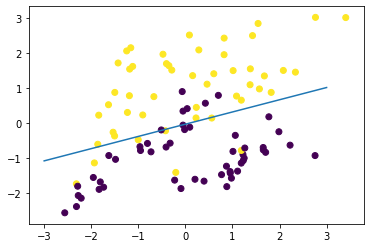

In [16]:
x_points = [-3, 3]
y_points = []
for x_point in x_points:
    y_point = -(model.intercept_ + (model.coef_[0][0]*x_point))/model.coef_[0][1]
    y_points.append(y_point)

pylab.plot(x_points, y_points)
pylab.scatter(x[:,0], x[:,1], c=y)
pylab.show()